In [9]:
import pandas as pd
import MeCab
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [10]:
def mecab_sep(text):
	m = MeCab.Tagger("-Ochasen")
	node = m.parseToNode(text)
	words_list = []
	while node:
		if node.feature.split(",")[0] in ["名詞"]:
			words_list.append(node.surface)
		node = node.next
	return words_list

### Bag-of-words / tf-idf
def calc_vecs(docs):
	vectorizer = TfidfVectorizer(analyzer=mecab_sep)
	vecs = vectorizer.fit_transform(docs)
	return vecs.toarray()

In [16]:
df = pd.read_csv("Dataset.csv",encoding='UTF-8')
tatget_labs = [
    '朝廣研','安部研','石田研','合志研','下川研',
    '成研','田中研','仲研','米元研','アプドゥハン研',
    '稲永研','于研','石田俊研','澤田研','安武研','前田研']

target_docs_df = df[df["研究室"].isin(tatget_labs )] 
target_docs_df.head()

,年度,学科／研究科,研究室,題目
3,H17,情報科学科,成研,対面教育を支援するためのウェブ助言システム
6,H17,情報科学科,仲研,生化学反応シミュレータの比較評価
7,H17,情報科学科,澤田研,FPGAを搭載したロボット教材のためのIPとしてKUE-CHIP2の検討
10,H17,情報科学科,稲永研,空港における目的地への交通手段検索システムの開発
11,H17,情報科学科,合志研,人の反応・判断能力測定用ドライビングシミュレータ


In [17]:
target_docs = target_docs_df["題目"].tolist()
all_docs_vecs = calc_vecs(target_docs_df["題目"])

vec = KMeans(n_clusters=16, init="k-means++")
vec.fit(all_docs_vecs)

vec.labels_[:20]

array([13, 13,  2, 13,  0, 13,  4, 13, 13,  9, 13, 12,  1, 13, 10, 14, 13,
       13,  4, 10])

In [18]:
# target_docs_df["クラス"] = vec.labels_
target_docs_df.insert(4,"クラス",vec.labels_) 
pd.crosstab(target_docs_df["研究室"],target_docs_df["クラス"])
cross_survive= pd.crosstab(target_docs_df['クラス'], target_docs_df['研究室'],normalize='index')
target_docs_df.head()

,年度,学科／研究科,研究室,題目,クラス
3,H17,情報科学科,成研,対面教育を支援するためのウェブ助言システム,13
6,H17,情報科学科,仲研,生化学反応シミュレータの比較評価,13
7,H17,情報科学科,澤田研,FPGAを搭載したロボット教材のためのIPとしてKUE-CHIP2の検討,2
10,H17,情報科学科,稲永研,空港における目的地への交通手段検索システムの開発,13
11,H17,情報科学科,合志研,人の反応・判断能力測定用ドライビングシミュレータ,0


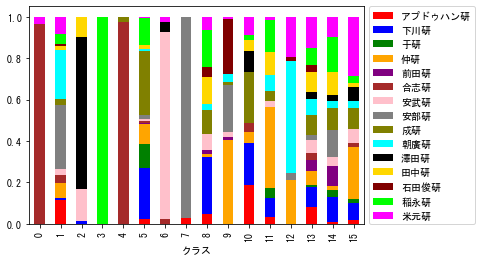

In [19]:
#文字化け
plt.rcParams["font.family"] = "MS Gothic"
# plt.figure(figsize=[15,20])
#カラー
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", 
        ["red", "blue", "green","orange", "purple", "brown", "pink", "gray", "olive", "cyan", 
         "black", "gold", "maroon", "lime", "fuchsia", "tan"])

cross_survive.plot.bar(stacked=True)
plt.legend( loc='center left', bbox_to_anchor=(1., .5))

In [15]:
k=3
target_docs_df[target_docs_df['クラス']==k].head()

,年度,学科／研究科,研究室,題目,クラス
40,H17,情報科学科,アプドゥハン研,セマンティックグリッドシミュレーションに関する研究,3
59,H17,情報科学科,アプドゥハン研,セマンティック・グリッドにおけるグリッド・ポータルに関する研究,3
62,H17,情報科学科,下川研,講義記録システムのアクセス解析,3
72,H17,情報科学科,下川研,ネットワーク接続情報を用いた研究時間記録システム,3
78,H17,情報科学科,稲永研,各種メディアを利用したアンケートによる意見集約方法の研究,3
